In [28]:
import ast
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.random_projection import GaussianRandomProjection
from optht.optht import optht

plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams.update({'font.size': 18})

(9214, 664)


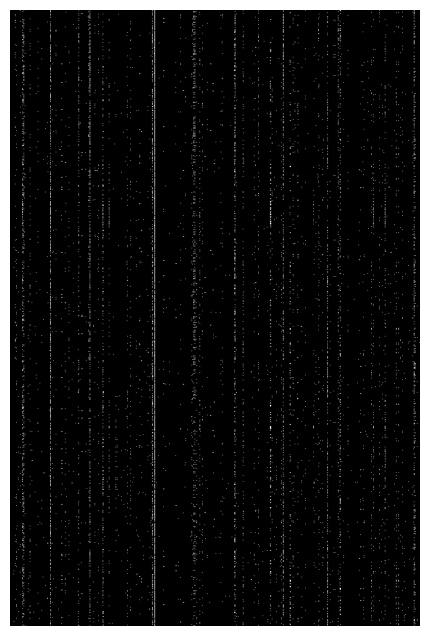

In [ ]:
books = pd.read_csv('books_cleaned.csv')
books['tags'] = books['tags'].apply(lambda x: ast.literal_eval(x))

mlb = MultiLabelBinarizer()
tags_matrix = pd.DataFrame(mlb.fit_transform(books['tags']), columns=mlb.classes_, index=books['book_title'])

In [34]:
U, S, VT = np.linalg.svd(tags_matrix, full_matrices=False)

r = optht(beta = min(tags_matrix.shape)/max(tags_matrix.shape), sv=S, sigma=None)

print(r)

233


In [39]:
svd = TruncatedSVD(n_components=r)
svd_matrix = svd.fit_transform(tags_matrix)

print(svd_matrix.shape)

(9214, 233)


In [40]:
norms = np.linalg.norm(svd_matrix, axis=1, keepdims=True)

no = []
for i, n in enumerate(norms):
    if not np.isclose(n, 1):
        no.append(n)

print(len(no))

norms = np.where(norms == 0, 1, norms)

normalized_svds = svd_matrix / norms

norms2 = np.linalg.norm(normalized_svds, axis=1, keepdims=True)

no = []
for i, n in enumerate(norms2):
    if not np.isclose(n, 1):
        no.append(n)

print(len(no))

9214
99


In [42]:
np.save('../data/svd_vectors.npy', normalized_svds)

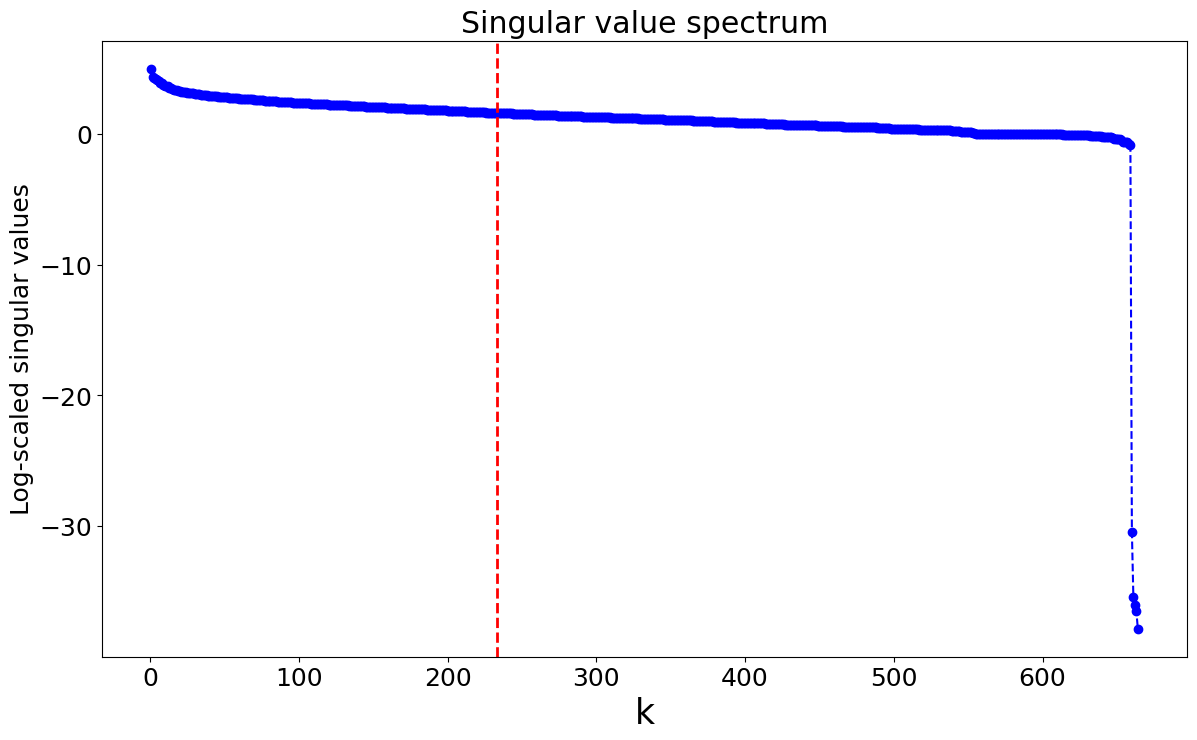

In [29]:
plt.plot( (np.arange(1,S.shape[0]+1)), np.log(S), c='b', marker='o', linestyle='--')
plt.xlabel('k', fontsize=25)
plt.ylabel('Log-scaled singular values')
plt.tick_params(axis='x') 
plt.tick_params(axis='y') 
plt.title('Singular value spectrum')
plt.axvline(k, c='r', linewidth=2, linestyle='--')
plt.show()

In [ ]:
U, S, VT = np.linalg.svd(tags_matrix_exp, full_matrices=False)

print(S.shape)

m, n = tags_matrix.shape
print(m)
print(n)
beta = m/n

print(beta)
omega_beta = 0.56 * beta**3 - 0.95 *beta**2 + 1.82 * beta + 1.43

cutoff = omega_beta * np.median(S)

print(cutoff)

print(np.where(S > cutoff))

r = np.max(np.where(S > cutoff))

print(r)

S_threshold = np.where(S > cutoff, S, 0)


In [8]:
column_vectors = np.diag(S_threshold[:r]) @ VT[:r, :]
print(column_vectors.shape)

(233, 9214)
